# Telling a Story with Data

---


### Project 1: Team Project Final Presentation

Miloy Ajmera (majmera@andrew.cmu.edu), Sahil Ahuja (sahilahu@andrew.cmu.edu) / Data Science, Spring 2023

The US job market is no longer quite so friendly. The US job market hit a two-decade low in 2022 despite the challenges posed by the pandemic and recession in previous years. [1]

Our findings are as follows:

*   The majority of layoffs are in the Consumer and Retail industries with the last 4 months ranging from November 2022 - Febuary 2023 have been impacted the most.
*   Byju's has laid off 5% of its employees totalling around 2,500 in the year 2022. [2]
*   Meta has been the highest amongst all tech companies with a total of 11,000 workers been laid off in November 2022. [3]
*   During the recent wave of mass layoffs, publicly traded companies in the post-IPO stage were hit particularly hard. 
*   Particularly in US location wise San Fransico (Bay Area) was the worst hit city





Sources : 
1. https://www.hr-brew.com/stories/2023/03/15/despite-tech-troubles-2022-was-a-historically-low-year-for-layoffs
2. https://economictimes.indiatimes.com/tech/startups/troubled-edtech-firm-byjus-continues-to-cut-jobs-another-1000-employees-laid-off/articleshow/97555721.cms?from=mdr
3. https://english.news.cn/20230315/e96fdb8ff18845d68a225127b9c83645/c.html#:~:text=Meta%20previously%20laid%20off%20around,far%2C%20exceeding%20Amazon's%2018%2C000%20cuts.

### DataSets:


1.  WARN Database - https://layoffdata.com/
2.  Kaggle Layoffs Dataset 2023 - https://layoffs.fyi/



### Our project aims to analyze the impact of layoffs on different types of companies (such as startups and established organizations) and how do they differ in the number of employees affected by layoffs.



In [ ]:
import pandas as pd
import numpy as np 
import altair as alt

Import the DataSet into Pandas Library

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df1 = pd.read_csv("layoffs_data.csv")
df2 = pd.read_csv("Warn.csv")

### Understand the data with basic EDA to clean and format the input data files

In [ ]:
df1.head()

Company    Location_HQ        Industry  Laid_Off_Count  Percentage  \
0           Wix       Tel Aviv       Marketing           370.0        0.06   
1          Neon      Sao Paulo         Finance           210.0        0.09   
2  DigitalOcean  New York City  Infrastructure           200.0        0.11   
3      Sprinklr  New York City         Support           100.0        0.04   
4       Milkrun         Sydney            Food             NaN        0.20   

                  Date                                             Source  \
0  2023-02-15 00:00:00  https://www.calcalistech.com/ctechnews/article...   
1  2023-02-15 00:00:00  https://www.seudinheiro.com/2023/empresas/unic...   
2  2023-02-15 00:00:00  https://www.theregister.com/2023/02/15/digital...   
3  2023-02-15 00:00:00  https://techcrunch.com/2023/02/15/sprinklr-lay...   
4  2023-02-15 00:00:00  https://www.smh.com.au/technology/milkrun-slas...   

   Funds_Raised     Stage           Date_Added        Country  \
0          58.0  Post-IPO  2023-02-15 21:00:06         Israel   
1         720.0  Series D  2023-02-15 21:58:53         Brazil   
2         491.0  Post-IPO  2023-02-15 22:55:04  United States   
3         429.0  Post-IPO  2023-02-15 19:05:49  United States   
4          86.0  Series A  2023-02-15 19:04:56      Australia   

                          List_of_Employees_Laid_Off  
0                                            Unknown  
1  https://docs.google.com/spreadsheets/d/1HPjbnd...  
2                                            Unknown  
3                                            Unknown  
4                                            Unknown

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2252 non-null   object 
 1   Location_HQ                 2252 non-null   object 
 2   Industry                    2252 non-null   object 
 3   Laid_Off_Count              1546 non-null   float64
 4   Percentage                  1517 non-null   float64
 5   Date                        2251 non-null   object 
 6   Source                      2252 non-null   object 
 7   Funds_Raised                2055 non-null   float64
 8   Stage                       2252 non-null   object 
 9   Date_Added                  2252 non-null   object 
 10  Country                     2252 non-null   object 
 11  List_of_Employees_Laid_Off  2251 non-null   object 
dtypes: float64(3), object(9)
memory usage: 211.2+ KB


In [ ]:
# Drop the null values where the laid off count = 0, convert dates into datetime formats
df1.dropna(subset=["Laid_Off_Count"],axis = 0 , inplace=True)
df1["Date"] = pd.to_datetime(df1["Date"])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546 entries, 0 to 2251
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Company                     1546 non-null   object        
 1   Location_HQ                 1546 non-null   object        
 2   Industry                    1546 non-null   object        
 3   Laid_Off_Count              1546 non-null   float64       
 4   Percentage                  1154 non-null   float64       
 5   Date                        1545 non-null   datetime64[ns]
 6   Source                      1546 non-null   object        
 7   Funds_Raised                1423 non-null   float64       
 8   Stage                       1546 non-null   object        
 9   Date_Added                  1546 non-null   object        
 10  Country                     1546 non-null   object        
 11  List_of_Employees_Laid_Off  1545 non-null   object      

In [ ]:
df1.head()

Company    Location_HQ        Industry  Laid_Off_Count  Percentage  \
0           Wix       Tel Aviv       Marketing           370.0        0.06   
1          Neon      Sao Paulo         Finance           210.0        0.09   
2  DigitalOcean  New York City  Infrastructure           200.0        0.11   
3      Sprinklr  New York City         Support           100.0        0.04   
6   CommerceHub         Albany          Retail           371.0        0.31   

        Date                                             Source  Funds_Raised  \
0 2023-02-15  https://www.calcalistech.com/ctechnews/article...          58.0   
1 2023-02-15  https://www.seudinheiro.com/2023/empresas/unic...         720.0   
2 2023-02-15  https://www.theregister.com/2023/02/15/digital...         491.0   
3 2023-02-15  https://techcrunch.com/2023/02/15/sprinklr-lay...         429.0   
6 2023-02-14  https://www.bizjournals.com/albany/news/2023/0...           NaN   

      Stage           Date_Added        Country  \
0  Post-IPO  2023-02-15 21:00:06         Israel   
1  Series D  2023-02-15 21:58:53         Brazil   
2  Post-IPO  2023-02-15 22:55:04  United States   
3  Post-IPO  2023-02-15 19:05:49  United States   
6  Acquired  2023-02-15 00:49:11  United States   

                          List_of_Employees_Laid_Off  
0                                            Unknown  
1  https://docs.google.com/spreadsheets/d/1HPjbnd...  
2                                            Unknown  
3                                            Unknown  
6                                            Unknown

In [ ]:
# Take data for relevant years since the dataset spans for around two decades
df2 = df2.drop(["Temporary/Permanent", "Union", "Region", "County", "Notes"], axis=1)
df2.dropna(subset=["State"],axis = 0 , inplace=True)
df2.dropna(subset=["Company"],axis = 0 , inplace=True)
df2.dropna(subset=["City"],axis = 0 , inplace=True)
df2.dropna(subset=["WARN Received Date"],axis = 0 , inplace=True)
df2.dropna(subset=["Effective Date"],axis = 0 , inplace=True)
df2.dropna(subset=["Number of Workers"],axis = 0 , inplace=True)
df2.dropna(subset=["Closure/Layoff"],axis = 0 , inplace=True)
df2["WARN Received Date"] = pd.to_datetime(df2["WARN Received Date"])
df2 = df2[df2["WARN Received Date"].dt.year >= 2020]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12572 entries, 0 to 44706
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   State               12572 non-null  object        
 1   Company             12572 non-null  object        
 2   City                12572 non-null  object        
 3   Number of Workers   12572 non-null  object        
 4   WARN Received Date  12572 non-null  datetime64[ns]
 5   Effective Date      12572 non-null  object        
 6   Closure/Layoff      12572 non-null  object        
 7   Industry            2917 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 884.0+ KB


In [ ]:
df2.head()

State                                     Company        City  \
0  Alabama                       Primus Solutions, LLC   Daleville   
1  Alabama                  Corsicana Mattress Company      Jasper   
2  Alabama           Portfolio Recovery Associates LLC  Birmingham   
3  Alabama  Crothall Healthcare Environmental Services     Gadsden   
4  Alabama                 National Packaging Co. Inc.     Decatur   

  Number of Workers WARN Received Date Effective Date Closure/Layoff Industry  
0               132         2021-07-28      9/16/2021         Layoff      NaN  
1                42         2021-07-26      9/20/2021        Closure      NaN  
2               133         2021-07-20      9/30/2021        Closure      NaN  
3                58         2021-07-07      8/21/2021         Layoff      NaN  
4                62         2021-06-30       8/7/2021         Layoff      NaN

## EDA Analysis

### Question 1: What are the most frequent causes of layoffs across various industries, and how have they evolved over time? 

In [ ]:
# Extract year's from the dataframe
df1["month"] = pd.DatetimeIndex(df1['Date']).month
df1["year"] = pd.DatetimeIndex(df1['Date']).year
df1["year"]


0       2023.0
1       2023.0
2       2023.0
3       2023.0
6       2023.0
         ...  
2247    2020.0
2248    2020.0
2249    2020.0
2250    2020.0
2251       NaN
Name: year, Length: 1546, dtype: float64

### Approach: 
##### Here we create Altair chart that displays a bar chart with the X-axis showing the month, the Y-axis showing the number of layoffs, and the color of the bars indicating the year. 

In [ ]:
alt.Chart(df1).mark_bar().encode(
    x=alt.X('month', title='Month'),
    y=alt.Y('Laid_Off_Count', title='Laid Off Count'),
    color=alt.Color('year:N', title='Year'),
    tooltip=["Industry", "year", "Laid_Off_Count"]
).properties(
    width=600,
    height=400,
    title={
        "text": ["Laid Off Counts by Year and Month"],
        "subtitle": ["Breakdown by Industry with Maximum Layoffs"]
    }
)

alt.Chart(...)

### Value proposition:
##### In 2022 companies started mass layoffs in October with a sudden spike in November. The data for 2023 is pretty recent but we can see the numbers for the layoffs are higher than that of the year 2022.

### Further Approach: 
##### We look upon the laid off counts in each industry per year to understand the trends.
##### This chart can be used to visualize the trends in layoffs over time across various industries. We will now filter by industry and year and get more insights into the causes and patterns of layoffs in different industries.
##### We can comprehend how layoffs are affecting particular industries and how they are distributed over the course of the year and compare the number of layoffs in other industries during the same time period.


In [ ]:

chart1 = alt.Chart(df1[(df1["Industry"] == "Finance") & (df1["year"] == 2022)]).mark_bar().encode(
    x = alt.X("month", axis=alt.Axis(title="Month")),
    y = alt.Y("Laid_Off_Count", axis=alt.Axis(title="Laid Off Count")),
    color = "year:N",
    tooltip = ["Industry","Laid_Off_Count"]
).properties(
    title = "Finance Industry Laid Off Count in 2022"
)

chart2 = alt.Chart(df1[(df1["Industry"] == "Education") & (df1["year"] == 2022)]).mark_bar().encode(
    x = alt.X("month", axis=alt.Axis(title="Month")),
    y = alt.Y("Laid_Off_Count", axis=alt.Axis(title="Laid Off Count")),
    color = "year:N",
    tooltip = ["Industry","Laid_Off_Count"]
).properties(
    title = "Education Industry Laid Off Count in 2022"
)

chart3 = alt.Chart(df1[(df1["Industry"] == "Retail") & (df1["year"] == 2022)]).mark_bar().encode(
    x = alt.X("month", axis=alt.Axis(title="Month")),
    y = alt.Y("Laid_Off_Count", axis=alt.Axis(title="Laid Off Count")),
    color = "year:N",
    tooltip = ["Industry","Laid_Off_Count"]
).properties(
    title = "Retail Industry Laid Off Count in 2022"
)

chart4 = alt.Chart(df1[(df1["Industry"] == "Consumer") & (df1["year"] == 2022)]).mark_bar().encode(
    x = alt.X("month", axis=alt.Axis(title="Month")),
    y = alt.Y("Laid_Off_Count", axis=alt.Axis(title="Laid Off Count")),
    color = "year:N",
    tooltip = ["Industry","Laid_Off_Count"]
).properties(
    title = "Consumer Industry Laid Off Count in 2022"
)

(chart1 | chart2) & (chart3 | chart4)

alt.VConcatChart(...)

### Value proposition: 
##### We can spot changes in industry dynamics as well as identify economic trends and challenges affecting these sectors. 
##### The visualization charts included in the code are show how many people will be laid off in various industries in 2022. The graphs display the number of layoffs each month in the Finance, Education, Consumer and Retail sectors. 
##### We see that the most number of layoffs are in the Consumer and Retail sectors with a peak in the months of November and December 2022, whereas the count of layoffs in the Finance and Education sectors are significantly lower.
##### Lets take a look at this news letter which explains similar trends and explains the causes of majority of the layoffs:
##### https://www.cmswire.com/customer-experience/tech-layoffs-why-tech-is-getting-hit-so-hard/
##### The newsletter also explains why there have been so many layoffs in the tech sector and how these layoffs are affecting consumer satisfaction and brand reputation.

### Question2 : How do the companies differ in the count or percentage of employees affected due to layoffs? 

### Approach:
##### Here we create an Altair chart that displays a bar chart with the X-axis showing "Industry" sorted by descending count, the Y-axis showing the "sum(Laid_Off_Count)" or the total number of layoffs, and the color of the bars indicating the "Industry" category.

In [ ]:
alt.Chart(df1).mark_bar().encode(
    x=alt.X("Industry:N", sort="-y"), # x-axis sorted by descending count
    y=alt.Y("sum(Laid_Off_Count):Q", axis=alt.Axis(title="Number of layoffs")), # total layoffs
    color=alt.Color("Industry:N", legend=None), # color by industry
    tooltip=["Industry", "sum(Laid_Off_Count)"]
).properties(
     width=600,
    height=400,
    title="Total Number of Layoffs by Industry"
)


alt.Chart(...)

### Further Approach:
#####  We create a heatmap by a color scale to represent the magnitude of the layoffs. 
### Value proposition:
##### It can help identify which industries and countries have been hit the hardest by layoffs.

In [ ]:

industry_country_layoffs = df1.groupby(["Industry", "Country"])["Laid_Off_Count"].sum().reset_index()
alt.Chart(industry_country_layoffs).mark_rect().encode(
    x=alt.X("Country:N", title="Country"),
    y=alt.Y("Industry:N", title="Industry"),
    color=alt.Color("Laid_Off_Count:Q", title="Laid Off Count"),
    tooltip=["Industry", "Country", "Laid_Off_Count"]
).properties(
    title={
        "text": ["Laid Off Counts by Industry and Country"],
        "subtitle": ["Summed over all years"]
    }
)


alt.Chart(...)

### Value proposition: 

##### Based on the heatmap, we see that the United States was hit the most more specifically in the Consumer, Retail, Healthcare, Transportation and Finance sectors.

### Further Approach: 
##### To investigate the distribution of layoffs across various organizations, we could use box plots, bar charts providing a comparison between each sector or industry. 
##### This would help the employees look for stable and secure job positions and would also understand the availability of jobs in each sector. 
##### Let us look at a news article : https://www.pymnts.com/economy/2023/report-united-states-job-cuts-reach-14-year-high/
##### The article analyzes a report indicating that job layoffs by US companies reached their highest level in the year 2022 and 2023. Despite being down 24% from January, the number of 77,000 cutbacks was 410% greater than 2022 as businesses attempt to minimize costs in the face of rising interest rates. According to the research, there were layoffs across all 30 categories, with the biggest hit being technology, retail, and finance. 




### Further Approach:
##### This section helps us visualize the number of layoffs with their percentages in this chart with x-axis representing the percentage of layoffs, y-axis representing the funds raised, color representing the industry, size representing the number of layoffs, and tooltip showing the details of company, industry, percentage, funds raised, layoffs count, and stage.
##### We can remove the outliers and would make the visualization better to understand and provide an answer to the question asked.

In [ ]:

alt.Chart(df1).mark_circle().encode(
    x=alt.X("Percentage:Q", title="Percentage of Layoffs"),
    y=alt.Y("Funds_Raised:Q", title="Funds Raised"),
    color=alt.Color("Industry:N", legend=None),
    size=alt.Size("Laid_Off_Count:Q", title="Number of Layoffs"),
    tooltip=["Company", "Industry", "Percentage", "Funds_Raised", "Laid_Off_Count", "Stage"]
).properties(
    width=600,
    height=400,
    title = "Percentage Layoffs vs Funds Raised"
)


alt.Chart(...)

##### Value proposition:
We see that Meta has the highest percentage of layoffs which totals to approximately 11,000 layoffs. 

Lets look at the news articles which explain further:
https://english.news.cn/20230315/e96fdb8ff18845d68a225127b9c83645/c.html#:~:text=Meta%20previously%20laid%20off%20around,far%2C%20exceeding%20Amazon's%2018%2C000%20cuts.

According to this news article, Meta, the parent company of Facebook, Instagram, and WhatsApp, had previously laid off around 11,000 workers in November 2022. Despite the previous layoffs, Meta's workforce grew by 20 percent by the end of 2022 compared to the previous year and almost doubled in size since before the pandemic in 2019. However, recently, Meta has announced that it will be implementing a second round of massive layoffs, resulting in the termination of an additional 10,000 jobs.

The current trend of massive layoffs in the tech industry, including the recent announcement by Meta to cut 10,000 jobs, serves as a stark reminder that despite one's contributions and dedication to a company, there are no guarantees that the company will reciprocate that loyalty. It emphasizes the value of having a contingency plan in place and being ready for unforeseen events like layoffs. In order to stay competitive and adaptive in a job market that is constantly evolving, individuals must prioritize their professional growth and development and regularly invest in their own skill sets and networks.

Source : https://www.vox.com/recode/2022/11/10/23451038/silicon-valley-layoffs-meta-facebook-jobs-work-identity

In [ ]:
## Focus on a specific industry and stage
df_united_states = df1[(df1["Country"] == "United States")]
df_us_laid_off_counts = pd.DataFrame(df_united_states.groupby(["Industry"])["Laid_Off_Count"].sum())
df_us_laid_off_counts.reset_index(inplace=True)
df_us_laid_off_counts
alt.Chart(df_us_laid_off_counts).mark_circle().encode(
    x=alt.X("Industry:N", title="Industry"),
    y=alt.Y("Laid_Off_Count:Q", title="Laid_Off_Count"),
    color=alt.Color("Industry:N", legend=None),
    size=alt.Size("Laid_Off_Count:Q", title="Layoffs"),
    tooltip=[ "Industry", "Laid_Off_Count"]
).properties(
    width=600,
    height=400,
    title={
        "text": ["Laid Off Counts by Industry in the United States"],
        "subtitle": ["Summed over all years"]
    }
)

alt.Chart(...)

### Value proposition:
##### Let us focus on the industries impacted in the United States. We see a number of layoffs in this chart which would help us understand the sectors that were least affected due to the layoffs, job seekers can further try finding opportunities that are stable in sectors like Data, Infrastructure, Travel and Security.

In [ ]:
## Focus on a specific industry and stage
## Lets look at the relationship between the percentage of layoffs and funds raised for the Education sector in India. 
df_percentage = df1[(df1["Industry"] == "Education") & (df1["Country"] == "India")]
alt.Chart(df_percentage).mark_circle().encode(
    x=alt.X("Percentage:Q", title="Percentage of Layoffs"),
    y=alt.Y("Funds_Raised:Q", title="Funds Raised"),
    color=alt.Color("Industry:N", legend=None),
    size=alt.Size("Laid_Off_Count:Q", title="Number of Layoffs"),
    tooltip=["Company", "Industry", "Percentage", "Funds_Raised", "Laid_Off_Count", "Stage", "Country"]
).properties(
    width=600,
    height=400,
    title="Layoffs in the Education Sector in India"
)

alt.Chart(...)

### Value proposition:
##### We see that Byju's was hit the most in India which is an Indian multinational educational technology
##### Lets take a look at a news article to understand the cause of these layoffs : 
##### https://brandequity.economictimes.indiatimes.com/news/business-of-brands/byjus-continues-to-cut-jobs-another-1000-employees-laid-off/97646812
##### We see from the report that Byju's has laid off several senior roles in verticals like product, strategy, and technology, as part of its cost-cutting exercise. The layoffs are in addition to the 5% of workers, or about 2,500 people, that Byju's had previously said it would be letting go in October 2022. The article also suggests that total layoffs are much higher in scale, estimated to be around 10,000. The cause for these layoffs is that Byju's has recorded huge losses in FY21, and the company has been embroiled in difficulties ranging from misselling claims to governance problems.


https://brandequity.economictimes.indiatimes.com/news/business-of-brands/byjus-continues-to-cut-jobs-another-1000-employees-laid-off/97646812

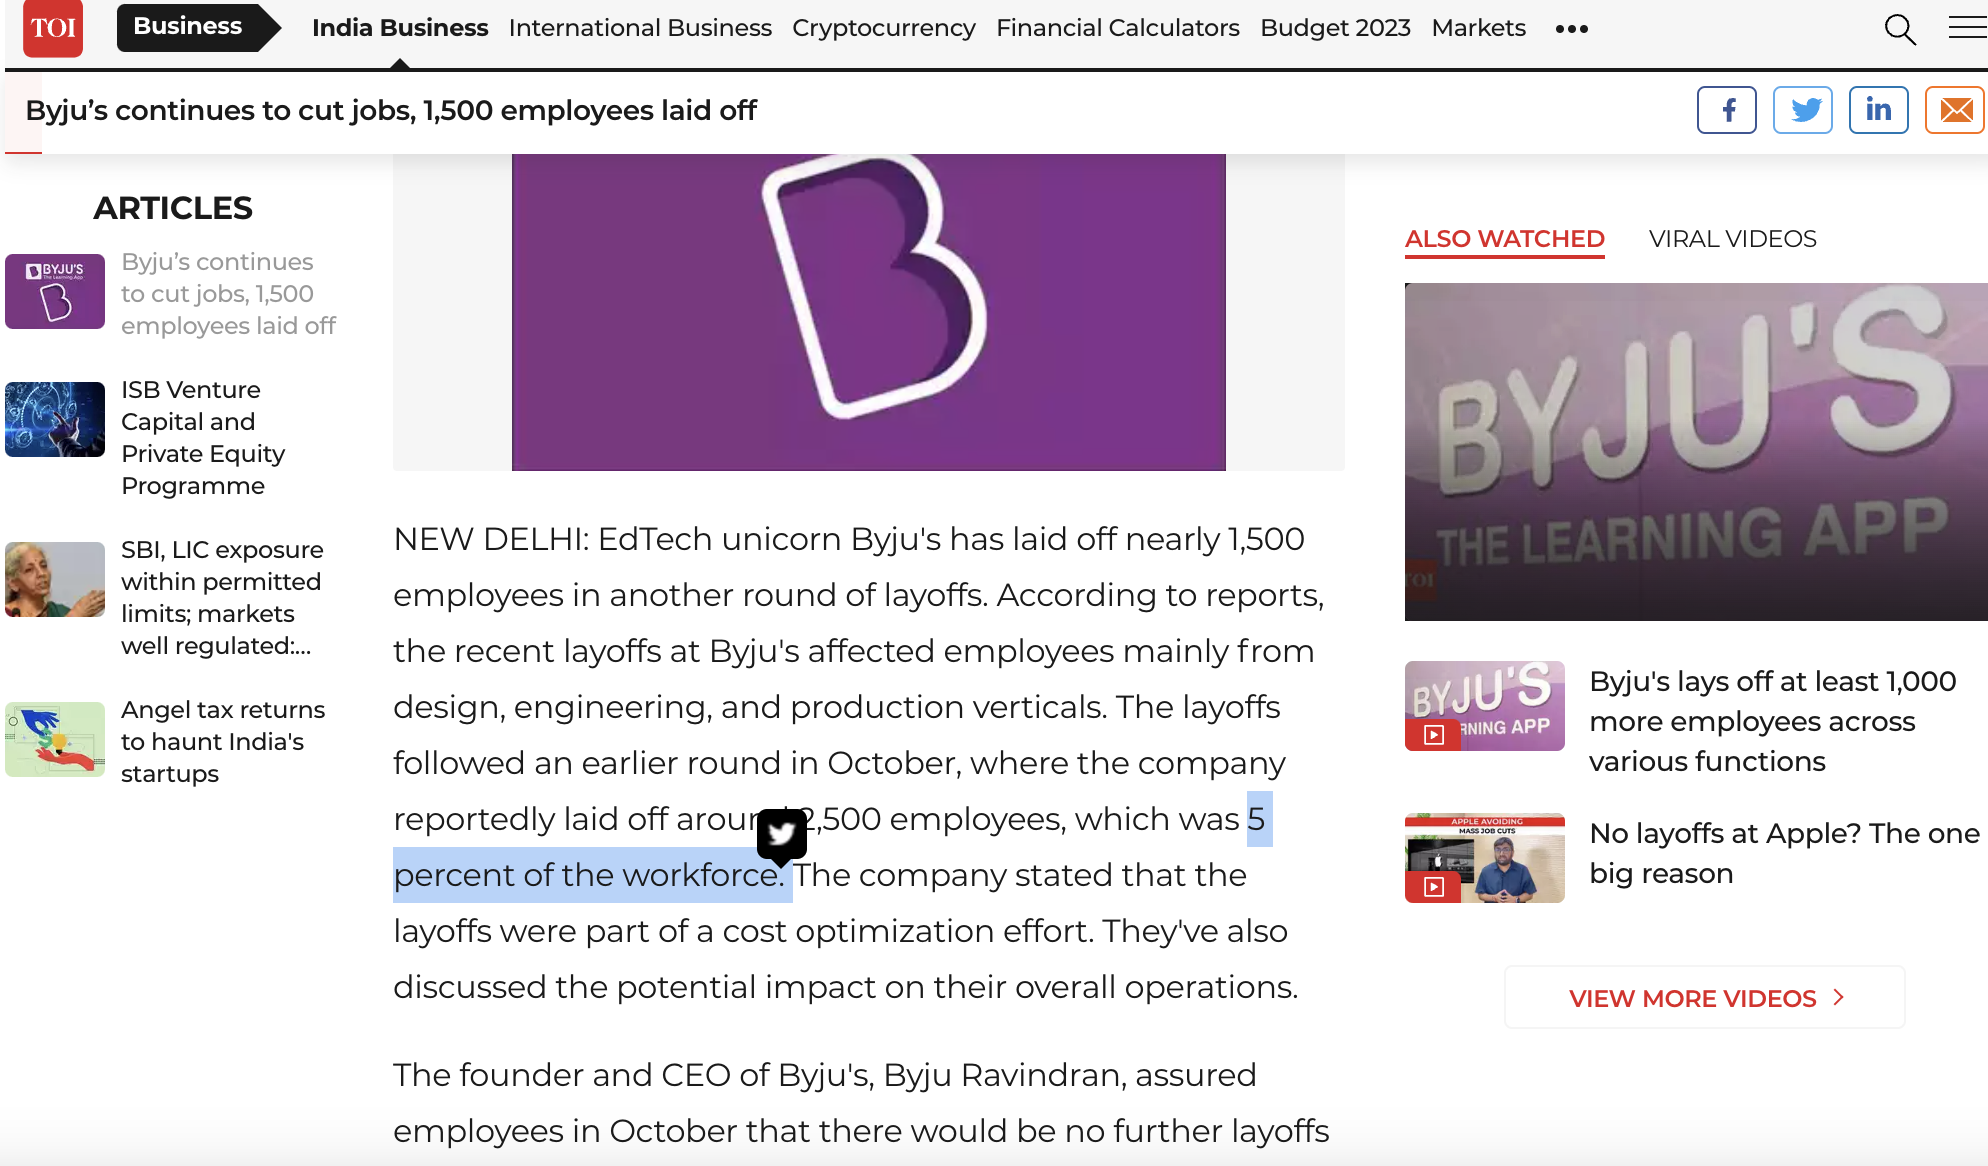)

### Question 3: How can layoffs effect a company's financial performance, and how do different company types (such as startups and established organizations) differ in the number of employees affected by layoffs? 


### Approach: Here we create an Altair chart that displays a bar chart with the X-axis showing the different stages of companies, sorted in descending order based on the total count of laid off employees in each stage. The Y-axis represents the total count of laid off employees for each stage.

In [ ]:
group_stage = pd.DataFrame(df1.groupby("Stage")["Laid_Off_Count"].sum().sort_values(ascending = False))
group_stage.reset_index(inplace = True)
alt.Chart(group_stage).mark_bar().encode(
    x=alt.X("Stage:N", sort="-y", title="Stage of Company"),
    y=alt.Y("Laid_Off_Count:Q", title="Laid Off Count"),
    tooltip=["Laid_Off_Count"]
).properties(
    width=600,
    height=400,
    title={
        "text": ["Total Layoffs by Stage of Company"],
        "subtitle": ["Grouped by Stage"]
    }
)

alt.Chart(...)

### Value proposition:
During the recent wave of mass layoffs, publicly traded companies in the post-IPO stage were hit particularly hard. As a result, when choosing a career, people should take the company's stage of development into account. They can gain a better understanding of the dangers and chances involved with their chosen course thanks to this. For example, people looking for job security may choose to join a startup, but those looking for bigger returns may choose to work for a public company. In the end, being aware of a company's stage of development can help with career planning and decision-making.

### Further Approach:
Here we create an Altair chart that displays a bar chart with two different encodings.

The first chart, chart1, encodes the x-axis with the  "Country", the y-axis with "Laid_Off_Count". The second chart, chart2, encodes the x-axis with the "Industry", the y-axis with the "Laid_Off_Count".

The charts below provides a breakdown of companies in the post-IPO stage by country and industry, and shows that the trend of mass layoffs has affected the United States the most. 

In [ ]:
# companies in in post- IPO stage were the most affected 
max_stagedf = df1.groupby("Stage").get_group("Post-IPO")
chart1 = alt.Chart(max_stagedf).mark_bar().encode(
    x=alt.X("Country:N", sort="-y", title="Country"),
    y=alt.Y("Laid_Off_Count:Q", title="Laid Off Count"),
    color="Country:N",
    tooltip=["Laid_Off_Count", "Country"]
).properties(
    width=600,
    height=400,
    title="Total Layoffs by Country"
)

chart1

alt.Chart(...)

In [ ]:
# companies in in post- IPO stage were the most affected 
max_stagedf = df1.groupby("Stage").get_group("Post-IPO")
chart2 = alt.Chart(max_stagedf).mark_bar().encode(
    x=alt.X("Industry:N", title="Industry"),
    y=alt.Y("Laid_Off_Count:Q", sort="-y", title="Laid Off Count"),
    tooltip=["Laid_Off_Count", "Industry"]
).properties(
    width=600,
    height=400,
    title="Total Layoffs by Industry"
)
chart2

alt.Chart(...)

### Value proposition: 
This information can be valuable for students who are planning to study abroad and may wish to work in their host country following graduation. Students can make more informed decisions about their career choices by understanding the state of the job market in different countries and the potential risks and opportunities related to different stages of business growth. Additionally, this information may be useful for those considering relocating to a different country in search of employment opportunities.


### Further Approach:
We prepare Altair charts to visualize the relationship between the percentage of layoffs and funds raised, as well as the number of layoffs, for companies in different funding stages and industries. The first chart shows acquired companies with layoffs, while the other charts show companies in Series B, C, and D funding stages.

In [ ]:
## Focus on a specific industry and stage
series_acquired = df1.groupby("Stage").get_group("Acquired")
series_B = df1.groupby("Stage").get_group("Series B")
series_C = df1.groupby("Stage").get_group("Series C")
series_D = df1.groupby("Stage").get_group("Series D")

chart_acquired = alt.Chart(series_acquired).mark_circle().encode(
    x=alt.X("Percentage:Q", title="Percentage of Layoffs"),
    y=alt.Y("Funds_Raised:Q", title="Funds Raised"),
    color=alt.Color("Industry:N", legend=None),
    size=alt.Size("Laid_Off_Count:Q", title="Number of Layoffs"),
    tooltip=["Company", "Industry", "Percentage", "Funds_Raised", "Laid_Off_Count", "Stage", "Country"]
).properties(title="Acquired Companies with Layoffs")

chart_B = alt.Chart(series_B).mark_circle().encode(
    x=alt.X("Percentage:Q", title="Percentage of Layoffs"),
    y=alt.Y("Funds_Raised:Q", title="Funds Raised"),
    color=alt.Color("Industry:N", legend=None),
    size=alt.Size("Laid_Off_Count:Q", title="Number of Layoffs"),
    tooltip=["Company", "Industry", "Percentage", "Funds_Raised", "Laid_Off_Count", "Stage", "Country"]
).properties(title="Series B Companies with Layoffs")

chart_C = alt.Chart(series_C).mark_circle().encode(
    x=alt.X("Percentage:Q", title="Percentage of Layoffs"),
    y=alt.Y("Funds_Raised:Q", title="Funds Raised"),
    color=alt.Color("Industry:N", legend=None),
    size=alt.Size("Laid_Off_Count:Q", title="Number of Layoffs"),
    tooltip=["Company", "Industry", "Percentage", "Funds_Raised", "Laid_Off_Count", "Stage", "Country"]
).properties(title="Series C Companies with Layoffs")

chart_D = alt.Chart(series_D).mark_circle().encode(
    x=alt.X("Percentage:Q", title="Percentage of Layoffs"),
    y=alt.Y("Funds_Raised:Q", title="Funds Raised"),
    color=alt.Color("Industry:N", legend=None),
    size=alt.Size("Laid_Off_Count:Q", title="Number of Layoffs"),
    tooltip=["Company", "Industry", "Percentage", "Funds_Raised", "Laid_Off_Count", "Stage", "Country"]
).properties(title="Series D Companies with Layoffs")


(chart_acquired | chart_B) & (chart_C | chart_D)


alt.VConcatChart(...)

### Value proposition:
As we previously discussed, larger companies were among the hardest hit by recent mass layoffs. However, the chart also reveals that startups in the nascent stage, particularly those in the midst of raising funding rounds, were also significantly impacted. In some cases, these companies were forced to lay off their entire workforce and shut down operations due to the impact of the economy. It is important to note that job seekers should not only focus on large, established companies or early-stage startups. Both extremes have their drawbacks, and it is crucial to carefully consider the potential risks and rewards of any job opportunity. By doing so, job seekers can find a position that best aligns with their skills, experience, and career goals while minimizing the risk of facing a layoff or other negative employment outcome.

In terms of the impact on financial performance of a company, lets take the use case of American Robotics in chart:

Article: https://dronedj.com/2023/01/13/american-robotics-job-cuts-loom-as-ondas-finalizes-airobotics-acquisition-and-integration/

The article suggests that the layoffs at American Robotics due to its acquisition by Ondas will result in cost savings of USD 18 million - USD 20 million. Ondas will therefore experience a net gain in cost savings as a result of the layoffs, while there will be some immediate one-time charges involved.

### Further Approach:
We try to understand the City-wise in the United States impact of layoffs in each industry / sector to provide insights into which cities were impacted the most by the layoffs.
The Altair chart is a bar chart, with the horizontal axis showing the location of the company headquarters sorted in descending order of the number of layoffs, and the vertical axis showing the total number of layoffs for each location. 

In [ ]:
us = df1.groupby("Country").get_group("United States")
alt.Chart(us).mark_bar().encode(
    x=alt.X("Location_HQ:N", sort="-y", title="Location HQ"),
    y=alt.Y("sum(Laid_Off_Count)", title="Number of Laid-Off Workers"),
    color=alt.Color("Industry:N", title="Industry"),
    tooltip=["Industry", "Laid_Off_Count"]
).properties(
    width=1200,
    height=600,
    title="Layoff Data by Location and Industry"
)

alt.Chart(...)

##### Taking the top 10 cities affected by the layoffs

In [ ]:
us = df1.groupby("Country").get_group("United States")
group_locations = us.groupby("Location_HQ")["Laid_Off_Count"].sum()
# Sort the resulting Series by the sum of Laid_Off_Count and select the top 10 rows
top10 = group_locations.sort_values(ascending=False).head(10)
top10list = top10.index.tolist()
us_filtered = us[us["Location_HQ"].isin(top10list)]

In [ ]:
alt.Chart(us_filtered).mark_bar().encode(
    y=alt.Y("Location_HQ:N", sort="-x", title="Location HQ"),
    x=alt.X("sum(Laid_Off_Count)", title="Number of Laid-Off Workers"),
    color=alt.Color("Industry:N", title="Industry"),
    tooltip=["Industry", "Laid_Off_Count"]
).properties(
    width=800,
    height=400,
    title="Layoff Data by Location (City) and Industry"
)

alt.Chart(...)

##### Taking the top 10 States affected by the layoffs historically from (2020-2023)

### Value Proposition: 
The graph offers insightful information on employment patterns in various nations and can guide job seekers in choosing their career options. When assessing work chances for persons living in the United States, location must be taken into account. States like California specifically, cities like San Francisco, for instance, provide a multitude of employment options across numerous industries, but the competition for these positions can be fierce. As a result, job security may be lessened in some fields due to intense competition. It is important to consider the benefits and drawbacks of living and working in different places, considering factors like cost of living, job opportunities, and access to networks relevant to your business. Jobseekers can discover a career path that fits their ambitions and offers the best potential for long-term success by carefully weighing these variables.



In [ ]:
df2["Number of Workers"] = pd.to_numeric(df2["Number of Workers"] , errors = "coerce")
df4 = pd.DataFrame(df2.groupby("State")["Number of Workers"].sum())
df4.sort_values("Number of Workers", ascending = False, inplace=True)
df5 = df4.head(10)
df5.reset_index(inplace = True)

alt.Chart(df5).mark_bar().encode(
    x="Number of Workers:Q",
    y=alt.Y("State:N", sort="-x", title="State"),
    tooltip=["State", "Number of Workers"]
).properties(
    width=1000,
    height=400,
    title="Number of Workers Laid Off by State for all the years 2020-2023"
)

alt.Chart(...)

### Further Approach:
Compare the layoffs between states in the United States for the year's 2021 and 2022.

In [ ]:
df2["WARN Received Month"] = pd.DatetimeIndex(df2['WARN Received Date']).month
df2["WARN Received Year"] = pd.DatetimeIndex(df2['WARN Received Date']).year


chart1 = alt.Chart(df2[(df2["WARN Received Year"] == 2021)]).mark_bar().encode(
    x=alt.X('State:N', sort='-y'),
    y=alt.Y('count():Q', title='Number of Layoffs'),
    color=alt.Color('State:N', legend=None)
).properties(
    width=600,
    height=400,
    title='Number of Layoffs by State in 2021'
)

chart2 = alt.Chart(df2[(df2["WARN Received Year"] == 2022)]).mark_bar().encode(
    x=alt.X('State:N', sort='-y'),
    y=alt.Y('count():Q', title='Number of Layoffs'),
    color=alt.Color('State:N', legend=None)
).properties(
    width=600,
    height=400,
    title='Number of Layoffs by State in 2022'
)

(chart1 | chart2)

alt.HConcatChart(...)

## CONCLUSION
---

---

Depending on the conditions surrounding the layoffs and the general health of the company, layoffs can have a variety of effects on a company's performance. Layoffs may have the following effects on a company's performance:

**Decreased productivity:** Following layoffs, surviving employees could be forced to take on more duties to make up for the loss of their coworkers. Lower productivity and overall output may result from this.

**Reduced morale:** Layoffs can be discouraging for the surviving employees, who could experience anxiety or uneasiness about their own job security. Because of this, motivation and engagement may decline, which may have an effect on the standard of work and overall performance.

**Loss of expertise:** Employees with specialized knowledge or skills who are essential to the business' operations may be let go as a result of layoffs. The company's ability to innovate or carry out specialized duties may be hampered by this loss of experience, thus decreasing its competitiveness.

**Damage to reputation:** Layoffs may have a negative effect on a company's standing with clients, vendors, and other stakeholders. This may worsen the company's financial performance by causing a fall in sales or trouble luring in new clients.

**Cost-saving measures:** Layoffs may occasionally be required to reduce expenses and enhance a company's financial performance. This can be a short-term gain, but if the business is unable to keep talented personnel or maintain its competitive edge, it could potentially have long-term effects.

Generally, layoffs should be carefully examined as a strategic choice rather than a hasty response to financial demands because they can have considerable and varied effects on a company's performance.


Link to the Video Presentation - https://youtu.be/rrr8oXaYcxY